### Audio Signal

An audio signal is a representation of sound, typically as an electrical voltage for analog signals and a binary number for digital signals. Audio signals have frequencies in the audio frequency range of roughly 20 to 20,000 Hz (the limits of human hearing). Typically is also a vibration that propagates as an audible wave of pressure, through a transmission medium such as a gas, liquid or solid.

###### Basics:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A pure tone is a tone with a sinusoidal waveform; this is, a sine wave of any frequency, phase, and amplitude.

A sine wave is characterized by its frequency, the number of cycles per second, its amplitude, the size of each cycle, and its phase that indicates the time alignment relative to a zero-time reference point.

1. Frequency - number of occurrences of a repeating event per unit of time.
    
    $f = \dfrac{1}{T}(hz)$ where T is the period or better said the duration each idependent cycle 
    
  
    
2. Amplitude, sound pressure or intensity - the larger the vibrations the louder a sound is.

##### Examples of waveforms taken with cos as the simples waveform:

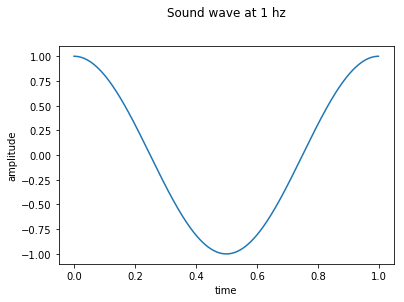

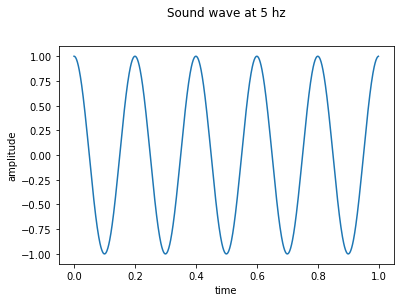

In [2]:
x = np.arange(0, 1, 0.001)

# Frequency 1 hz
fq = 1

plt.title("Sound wave at 1 hz", pad = 30)
plt.xlabel("time")
plt.ylabel("amplitude")
plt.plot(x, np.cos(x * 2 * np.pi * fq))
plt.show()

# Frequency 5 hz
fq = 5

plt.title("Sound wave at 5 hz", pad = 30)
plt.xlabel("time")
plt.ylabel("amplitude")
plt.plot(x, np.cos(x * 2 * np.pi * fq))
plt.show()

Where real sounds are composed of thousand of pure tones that all combined produce a distinct waveform like:

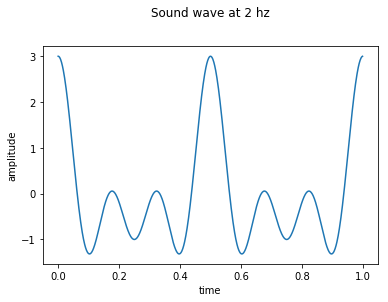

In [3]:
x = np.arange(0, 1, 0.001)

# Frequencies 2, 4, 6 hz that are all combined together to create custom waveform
fqs = [2, 4, 6]

def amplitude(x):
    sum = 0
    for f in fqs:
        sum += np.cos(x * 2 * np.pi * f)
        
    return sum

plt.title("Sound wave at 2 hz", pad = 30)
plt.xlabel("time")
plt.ylabel("amplitude")
plt.plot(x, amplitude(x))
plt.show()

They are hundreds of musical instruments like guitars, drums, bass guitar, piano that offer a combination of different but related frequencies that combined together create distinctive tone of the instrument.

The lowest frequency is usually dominant like in the upper case where the frequency 2hz is the lowest and the dominant one that you will hear the most considered as pitch, but it's no always the case and we'll see it later.

Even though playing the same note will produce the same output, that's not the case because of harmonics. Because, each instrument has its notes divided by an octave that represents the interval between one musical pitch and another with half or double its frequency.

(E.G) Piano, the notes starts with C D E F G A B | C D E F G A B | C D E F G A B | ... where each divider represents an end of an octave, let's take the 4th octave as an example:

1. C4 = 261.626 hz
2. D4 = 293.665 hz
3. E4 = 329.627 hz
4. G4 = 391.995 hz
5. A4 = 440.000 hz
6. B4 = 493.883 hz

Thus, arriving at the end of an octave, we are continuing with C5 that is double the frequency of C4, the same as D5 being double of D4, ...

$ C5 = C4 * 2 = 261.626 * 2 = 523.252\ hz$

Where 4th octave is from 261.626 hz up to 523.252 hz and the following 5th octave is from 523.252 hz to 1046.502 hz and so on and on...

This is because musical instruments do not vibrate at a single frequency: a given note involves vibrations at many different frequencies, often called harmonics, partials, or overtones. The relative pitch and loudness of these overtones gives the note a characteristic sound we call the timbre of the instrument. Given that they operate on multitude of frequencies that makes up the note, so each instrument has its specific sound. 

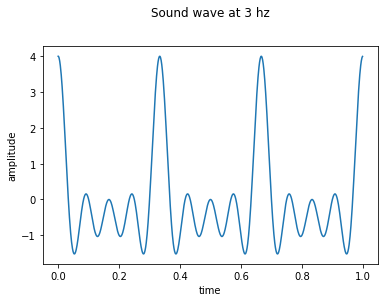

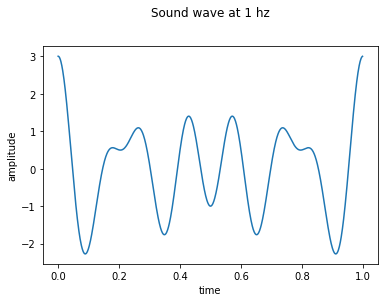

In [4]:
# Frequencies 3, 6, 9, 12 hz that are all combined together to create custom waveform
# They are often called harmonics where the 3 hz wave is the harmonic fundamental
# Thus the harmonic fundamental is a integer multiple of all other frequencies
# 12 = 4 * 3, 9 = 3 * 3, ...
fqs = [3, 6, 9, 12]

plt.title("Sound wave at 3 hz", pad = 30)
plt.xlabel("time")
plt.ylabel("amplitude")
plt.plot(x, amplitude(x))
plt.show()

# Frequencies 4, 5, 7 hz are not harmonics because the fundamental one 3 hz is not an integer multiple
fqs = [4, 5, 7]


plt.title("Sound wave at 1 hz", pad = 30)
plt.xlabel("time")
plt.ylabel("amplitude")
plt.plot(x, amplitude(x))
plt.show()

What we have seen so far is the <b>Time-Domain</b> that represents the variation of amplitude of signal with time. Where amplitude is maped to the respect of time that makes up the time domain signal.

(E.G) At 0.25 sec we can have an aproximative amplitude of 4, while at 2.21 sec we can have an amplitude of 21.

Next, is the <b>Frequency-Domain</b> analysis shows how the signal's energy is distributed over a range of frequencies.
It hold information about the signal's magnitude and also the phase at each frequency. The output of the FFT computation is complex, by having a real part and an imaginary part, that hold enough information for us to compute the Magnitude of each frequency as follows:

$ \sqrt{x_r ^ 2 + x_i ^ 2} $

And the phase of the signal that tells you how all the frequency components align in time computed as:

$ \arctan(x_i\ /\ x_r) $

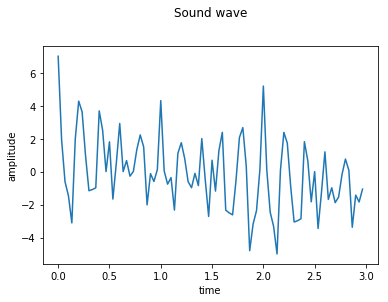

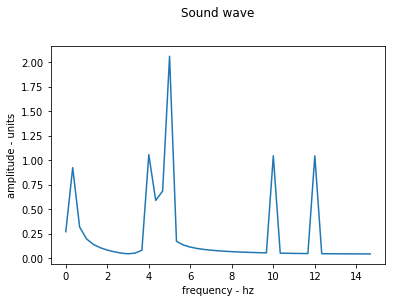

In [52]:
import numpy as np

# sample rate that we will operate on
sample_rate = 30

# working on corresponding frequencies
fqs = [0.2, 4, 4.5, 5, 5, 12, 200]

# generating the time domain of the signal
t = np.arange(0, 3, 1 / sample_rate)

# signal generation
wave = amplitude(t)

# plotting the signal
plt.title("Sound wave", pad = 30)
plt.xlabel("time")
plt.ylabel("amplitude")
plt.plot(t, wave)
plt.show()

# size of output frequency bins of the FFT same as the size of signal
fft_size = len(t)

# half of output result is unnecessary
S = int(fft_size / 2)

# sample space in time domain, distance between current sample and the following one
sample_space = 1 / sample_rate

# frequencies bins creation
bins = np.fft.fftfreq(fft_size, sample_space)

# each nth bin will analysis the magnitude of the freq [n * bin_sample, (n + 1) * bin_sample]
bin_sample = sample_rate / fft_size

# dft result with [:S] is equal to [S:]
fft_output = np.fft.fft(wave)[:S]

# amplitude extractor from the dft data by taking the magnitude of a complex number 
magnitude_extractor = lambda x : np.sqrt(np.real(x) ** 2 + np.imag(x) ** 2) / S 

# magnitude extraction of the signal
fft_data = magnitude_extractor(fft_output)

# range of the output frequencies detected by the FFT is half of the sample rate - 15 hz
# note that increasing the sample_rate we will able to detect higher frequencies like 200 with sample_rate > 400
# here is a trade-off between accuracy and performance, higher sample_rate gives 
# better analysis while requiring heavy computation operations
plt.title("Sound wave", pad = 30)
plt.xlabel("frequency - hz")
plt.ylabel("amplitude - units")
plt.plot(bins[:S], fft_data)
plt.show()

Downsample a signal:

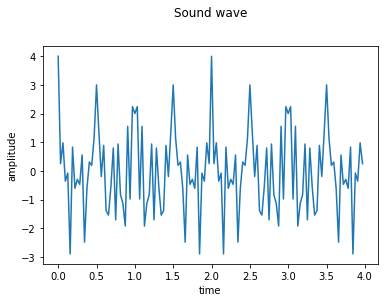

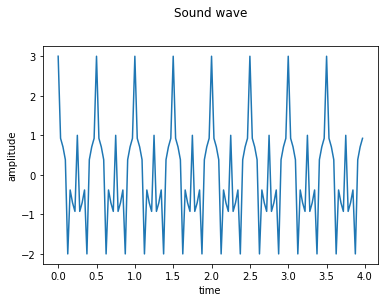

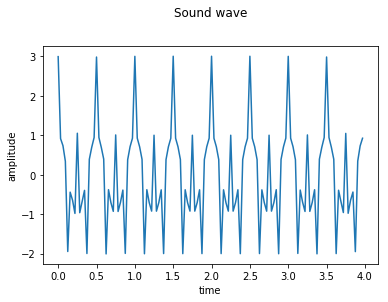

In [161]:
from scipy.signal import butter, lfilter

# working on corresponding frequencies
fqs = [2, 4, 15.5, 40]

def plot_graph(x_values, y_values):
    plt.title("Sound wave", pad = 30)
    plt.xlabel("time")
    plt.ylabel("amplitude")
    plt.plot(x_values, y_values)
    plt.show()
    

def generate_signal(sample_rate):
    # generating the time domain of the signal
    t = np.arange(0, 4, 1 / sample_rate)
    
    # signal generation
    wave = amplitude(t)
    
    return (t, wave)
    
def plot_digital_signal(sample_rate):
    # signal generation
    t, wave = generate_signal(sample_rate)
    
    # plotting the signal
    plot_graph(t, wave)

# # original
# plot_digital_signal(16)

# # downsampling
# plot_digital_signal(8)

# # upsampling
# plot_digital_signal(32)

# signal filtering with a low-pass filter

# original
sample_rate = 32

# sample frequency
sample_frequency = 54

# original plot
fqs = [2, 4, 15.5, 54]
plot_digital_signal(sample_rate)

# expected
sample_rated_cutoff = 24

# expected plot
fqs = [2, 4, 20]
plot_digital_signal(sample_rate)

def low_pass_filter(data, cutoff_freq, sample_frequency):
    nyquist_freq = 0.5 * sample_frequency
    normal_cutoff = cutoff_freq / nyquist_freq
    
    b, a = butter(6, normal_cutoff, btype = 'low', analog = False)
    
    return lfilter(b, a, data)

t, wave = generate_signal(sample_rate)

down_scaled_wave = manual_filtering(wave, sample_rated_cutoff, 54)
plot_graph(t, down_scaled_wave)